In [153]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [154]:
SMALL_SIZE = 15
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE) 

In [114]:
csv_files_raw = 'lzbench-raw.out'
df = pd.read_csv(csv_files_raw, sep=",")

df['Ratio'] = df['Ratio']/100

#raw
raw_memcpy = df[df['Compressor name'] == 'memcpy']
raw_blosc = df[df['Compressor name'] == "blosclz"]
raw_bzip2 = df[df['Compressor name'] == "bzip2"]
raw_lz4hc = df[df['Compressor name'] == "lz4hc"]
raw_lz4 = df[df['Compressor name'] == "lz4"]
raw_zstd = df[df['Compressor name'] == "zstd"]
raw_lzma = df[df['Compressor name'] == "lzma"]
raw_zlib = df[df['Compressor name'] == "zlib"]

#proc
csv_files_proc = 'lzbench-proc.out'
df_proc = pd.read_csv(csv_files_proc, sep=",")
df_proc['Ratio'] = df_proc['Ratio']/100

proc_memcpy = df_proc[df_proc['Compressor name'] == 'memcpy']
proc_blosc = df_proc[df_proc['Compressor name'] == "blosclz"]
proc_bzip2 = df_proc[df_proc['Compressor name'] == "bzip2"]
proc_lz4hc = df_proc[df_proc['Compressor name'] == "lz4hc"]
proc_lz4 = df_proc[df_proc['Compressor name'] == "lz4"]
proc_zstd = df_proc[df_proc['Compressor name'] == "zstd"]
proc_lzma = df_proc[df_proc['Compressor name'] == "lzma"]
proc_zlib = df_proc[df_proc['Compressor name'] == "zlib"]

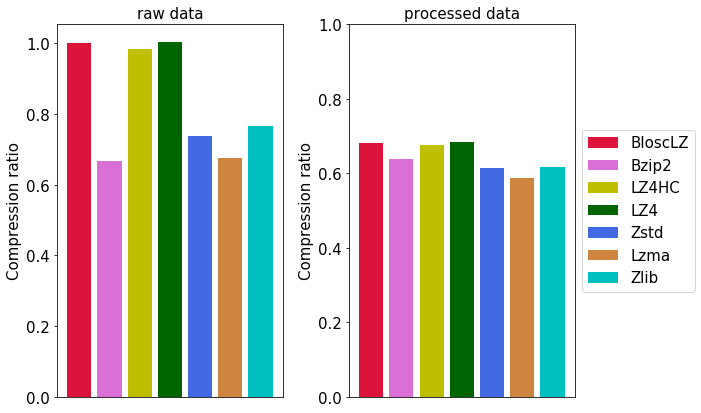

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.show()

ax1.bar('blosclz', raw_blosc.groupby(['Level'])['Ratio'].mean().min(), label='BloscLZ', color='crimson')
ax1.bar('bzip2', raw_bzip2.groupby(['Level'])['Ratio'].mean().min(), label='Bzip2', color='orchid')
ax1.bar('lz4hc', raw_lz4hc.groupby(['Level'])['Ratio'].mean().min(), label='LZ4HC', color='y')
ax1.bar('lz4', raw_lz4.groupby(['Level'])['Ratio'].mean().min(), label='LZ4', color='darkgreen')
ax1.bar('zstd', raw_zstd.groupby(['Level'])['Ratio'].mean().min(), label='Zstd', color='royalblue')
ax1.bar('lzma', raw_lzma.groupby(['Level'])['Ratio'].mean().min(), label='Lzma', color='peru')
ax1.bar('zlib', raw_zlib.groupby(['Level'])['Ratio'].mean().min(), label='Zlib', color='c')

ax2.bar('blosclz', proc_blosc.groupby(['Level'])['Ratio'].mean().min(), label='BloscLZ', color='crimson')
ax2.bar('bzip2', proc_bzip2.groupby(['Level'])['Ratio'].mean().min(), label='Bzip2', color='orchid')
ax2.bar('lz4hc', proc_lz4hc.groupby(['Level'])['Ratio'].mean().min(), label='LZ4HC', color='y')
ax2.bar('lz4', proc_lz4.groupby(['Level'])['Ratio'].mean().min(), label='LZ4', color='darkgreen')
ax2.bar('zstd', proc_zstd.groupby(['Level'])['Ratio'].mean().min(), label='Zstd', color='royalblue')
ax2.bar('lzma', proc_lzma.groupby(['Level'])['Ratio'].mean().min(), label='Lzma', color='peru')
ax2.bar('zlib', proc_zlib.groupby(['Level'])['Ratio'].mean().min(), label='Zlib', color='c')

ax1.set_title('raw data')
ax2.set_title('processed data')
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax1.set_ylabel('Compression ratio')
ax2.set_ylabel('Compression ratio')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(0,1)
fig.tight_layout()

fig.savefig('LzBench_Ratio.png', dpi=900, bbox_inches='tight')

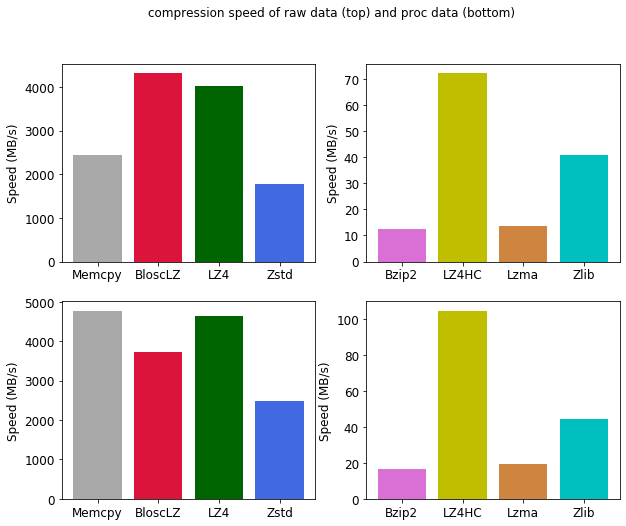

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.show()

ax[0, 0].bar('Memcpy', raw_memcpy['Compression speed'], label='memcpy', color='darkgrey')
ax[0, 0].bar('BloscLZ', raw_blosc.groupby(['Level'])['Compression speed'].mean().max(), label='BloscLZ', color='crimson')
ax[0, 0].bar('LZ4', raw_lz4.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4', color='darkgreen')
ax[0, 0].bar('Zstd', raw_zstd.groupby(['Level'])['Compression speed'].mean().max(), label='Zstd', color='royalblue')
ax[0, 1].bar('Bzip2', raw_bzip2.groupby(['Level'])['Compression speed'].mean().max(), label='Bzip2', color='orchid')
ax[0, 1].bar('LZ4HC', raw_lz4hc.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4HC', color='y')
ax[0, 1].bar('Lzma', raw_lzma.groupby(['Level'])['Compression speed'].mean().max(), label='Lzma', color='peru')
ax[0, 1].bar('Zlib', raw_zlib.groupby(['Level'])['Compression speed'].mean().max(), label='Zlib', color='c')

ax[1, 0].bar('Memcpy', proc_memcpy['Compression speed'], label='memcpy', color='darkgrey')
ax[1, 0].bar('BloscLZ', proc_blosc.groupby(['Level'])['Compression speed'].mean().max(), label='BloscLZ', color='crimson')
ax[1, 0].bar('LZ4', proc_lz4.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4', color='darkgreen')
ax[1, 0].bar('Zstd', proc_zstd.groupby(['Level'])['Compression speed'].mean().max(), label='Zstd', color='royalblue')
ax[1, 1].bar('Bzip2', proc_bzip2.groupby(['Level'])['Compression speed'].mean().max(), label='Bzip2', color='orchid')
ax[1, 1].bar('LZ4HC', proc_lz4hc.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4HC', color='y')
ax[1, 1].bar('Lzma', proc_lzma.groupby(['Level'])['Compression speed'].mean().max(), label='Lzma', color='peru')
ax[1, 1].bar('Zlib', proc_zlib.groupby(['Level'])['Compression speed'].mean().max(), label='Zlib', color='c')

ax[1, 0].set_ylabel('Speed (MB/s)')
ax[0, 0].set_ylabel('Speed (MB/s)')
ax[0, 1].set_ylabel('Speed (MB/s)')
ax[1, 1].set_ylabel('Speed (MB/s)')
plt.suptitle('compression speed of raw data (top) and proc data (bottom)')

fig.savefig('LzBench_CompSpeed.png')

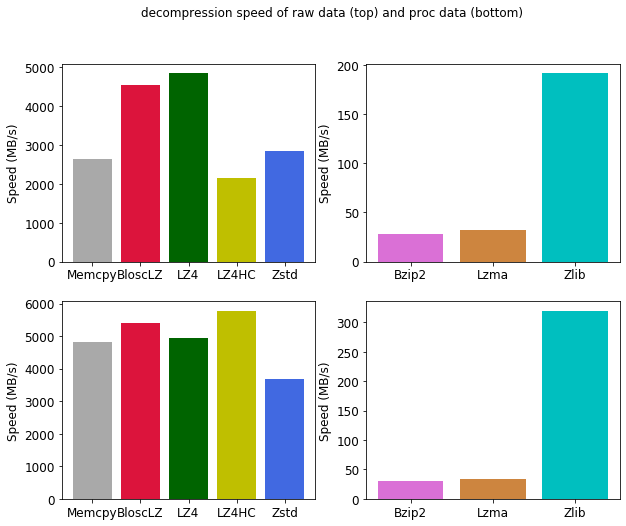

In [117]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.show()

ax[0, 0].bar('Memcpy', raw_memcpy['Decompression speed'], label='memcpy', color='darkgrey')
ax[0, 0].bar('BloscLZ', raw_blosc.groupby(['Level'])['Decompression speed'].mean().max(), label='blosc', color='crimson')
ax[0, 0].bar('LZ4', raw_lz4.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4', color='darkgreen')
ax[0, 0].bar('LZ4HC', raw_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4hc', color='y')
ax[0, 0].bar('Zstd', raw_zstd.groupby(['Level'])['Decompression speed'].mean().max(), label='zstd', color='royalblue')
ax[0, 1].bar('Bzip2', raw_bzip2.groupby(['Level'])['Decompression speed'].mean().max(), label='bzip2', color='orchid')
ax[0, 1].bar('Lzma', raw_lzma.groupby(['Level'])['Decompression speed'].mean().max(), label='lzma', color='peru')
ax[0, 1].bar('Zlib', raw_zlib.groupby(['Level'])['Decompression speed'].mean().max(), label='zlib', color='c')

ax[1, 0].bar('Memcpy', proc_memcpy['Decompression speed'], label='memcpy', color='darkgrey')
ax[1, 0].bar('BloscLZ', proc_blosc.groupby(['Level'])['Decompression speed'].mean().max(), label='blosc', color='crimson')
ax[1, 0].bar('LZ4', proc_lz4.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4', color='darkgreen')
ax[1, 0].bar('LZ4HC', proc_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4hc', color='y')
ax[1, 0].bar('Zstd', proc_zstd.groupby(['Level'])['Decompression speed'].mean().max(), label='zstd', color='royalblue')
ax[1, 1].bar('Bzip2', proc_bzip2.groupby(['Level'])['Decompression speed'].mean().max(), label='bzip2', color='orchid')
ax[1, 1].bar('Lzma', proc_lzma.groupby(['Level'])['Decompression speed'].mean().max(), label='lzma', color='peru')
ax[1, 1].bar('Zlib', proc_zlib.groupby(['Level'])['Decompression speed'].mean().max(), label='zlib', color='c')

ax[1, 0].set_ylabel('Speed (MB/s)')
ax[0, 0].set_ylabel('Speed (MB/s)')
ax[0, 1].set_ylabel('Speed (MB/s)')
ax[1, 1].set_ylabel('Speed (MB/s)')

plt.suptitle('decompression speed of raw data (top) and proc data (bottom)')

fig.savefig('LzBench_DeCompSpeed.png')

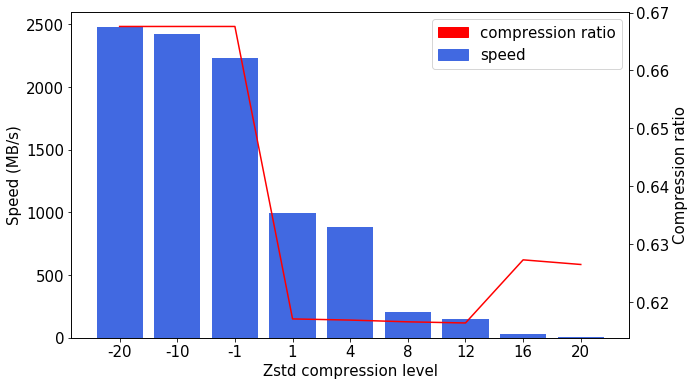

In [156]:
#PROC ZSTD
x = ['-20', '-10', '-1', '1', '4', '8', '12', '16', '20']
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
ax.bar(x, [2477.80,2420.84,2229.94,996.02,885.96,203.12,149.28,26.57,8.11], color='royalblue', label='speed')
ax2.plot(x, [0.6676,0.6676,0.6676,0.6171,0.6169,0.6166,0.6164,0.6273,0.6265], color='red', label='ratio')

ax.set_ylabel('Speed (MB/s)')
ax2.set_ylabel('Compression ratio')
ax.set_xlabel('Zstd compression level')

ax.set_xticklabels(x)
ratio_legend = mpatches.Patch(color='red', label='compression ratio')
speed_legend = mpatches.Patch(color='royalblue', label='speed')
plt.legend(loc="best", handles=[ratio_legend, speed_legend])

fig.savefig('LzBench_Level.png', dpi=900, bbox_inches='tight')

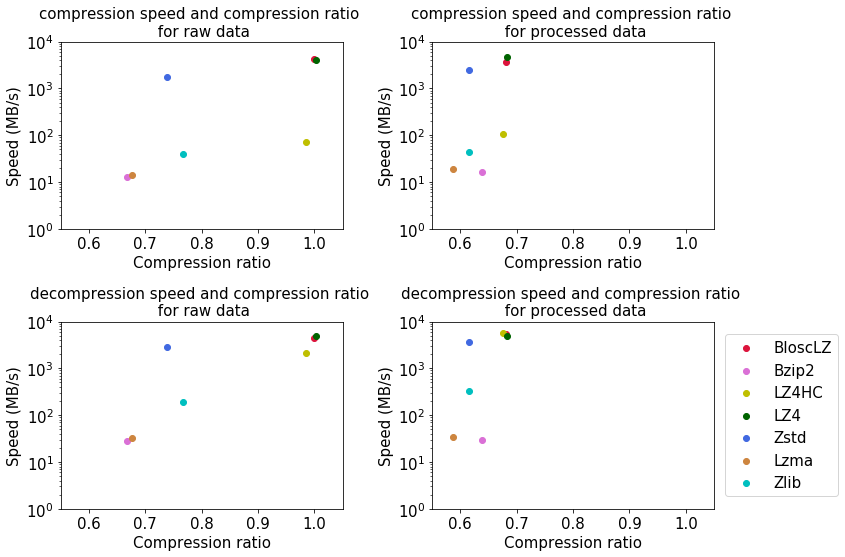

In [212]:
#fig=plt.figure()
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
#fig.show()

ax[0,0].scatter(raw_blosc.groupby(['Level'])['Ratio'].mean().min(),raw_blosc.groupby(['Level'])['Compression speed'].mean().max(), label="BloscLZ", color="crimson")
ax[0,0].scatter(raw_bzip2.groupby(['Level'])['Ratio'].mean().min(), raw_bzip2.groupby(['Level'])['Compression speed'].mean().max(), label="Bzip2", color="orchid")
ax[0,0].scatter(raw_lz4hc.groupby(['Level'])['Ratio'].mean().min(), raw_lz4hc.groupby(['Level'])['Compression speed'].mean().max(), label="LZ4HC", color="y")
ax[0,0].scatter(raw_lz4.groupby(['Level'])['Ratio'].mean().min(), raw_lz4.groupby(['Level'])['Compression speed'].mean().max(), label="LZ4", color='darkgreen')
ax[0,0].scatter(raw_zstd.groupby(['Level'])['Ratio'].mean().min(), raw_zstd.groupby(['Level'])['Compression speed'].mean().max(), label="Zstd", color="royalblue")
ax[0,0].scatter(raw_lzma.groupby(['Level'])['Ratio'].mean().min(), raw_lzma.groupby(['Level'])['Compression speed'].mean().max(), label="Lzma", color="peru")
ax[0,0].scatter(raw_zlib.groupby(['Level'])['Ratio'].mean().min(), raw_zlib.groupby(['Level'])['Compression speed'].mean().max(), label="Zlib", color="c")

ax[0,1].scatter(proc_blosc.groupby(['Level'])['Ratio'].mean().min(),proc_blosc.groupby(['Level'])['Compression speed'].mean().max(), label="BloscLZ", color="crimson")
ax[0,1].scatter(proc_bzip2.groupby(['Level'])['Ratio'].mean().min(), proc_bzip2.groupby(['Level'])['Compression speed'].mean().max(), label="Bzip2", color="orchid")
ax[0,1].scatter(proc_lz4hc.groupby(['Level'])['Ratio'].mean().min(), proc_lz4hc.groupby(['Level'])['Compression speed'].mean().max(), label="LZ4HC", color="y")
ax[0,1].scatter(proc_lz4.groupby(['Level'])['Ratio'].mean().min(), proc_lz4.groupby(['Level'])['Compression speed'].mean().max(), label="LZ4", color='darkgreen')
ax[0,1].scatter(proc_zstd.groupby(['Level'])['Ratio'].mean().min(), proc_zstd.groupby(['Level'])['Compression speed'].mean().max(), label="Zstd", color="royalblue")
ax[0,1].scatter(proc_lzma.groupby(['Level'])['Ratio'].mean().min(), proc_lzma.groupby(['Level'])['Compression speed'].mean().max(), label="Lzma", color="peru")
ax[0,1].scatter(proc_zlib.groupby(['Level'])['Ratio'].mean().min(), proc_zlib.groupby(['Level'])['Compression speed'].mean().max(), label="Zlib", color="c")

ax[1,0].scatter(raw_blosc.groupby(['Level'])['Ratio'].mean().min(),raw_blosc.groupby(['Level'])['Decompression speed'].mean().max(), label="BloscLZ", color="crimson")
ax[1,0].scatter(raw_bzip2.groupby(['Level'])['Ratio'].mean().min(), raw_bzip2.groupby(['Level'])['Decompression speed'].mean().max(), label="Bzip2", color="orchid")
ax[1,0].scatter(raw_lz4hc.groupby(['Level'])['Ratio'].mean().min(), raw_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(), label="LZ4HC", color="y")
ax[1,0].scatter(raw_lz4.groupby(['Level'])['Ratio'].mean().min(), raw_lz4.groupby(['Level'])['Decompression speed'].mean().max(), label="LZ4", color='darkgreen')
ax[1,0].scatter(raw_zstd.groupby(['Level'])['Ratio'].mean().min(), raw_zstd.groupby(['Level'])['Decompression speed'].mean().max(), label="Zstd", color="royalblue")
ax[1,0].scatter(raw_lzma.groupby(['Level'])['Ratio'].mean().min(), raw_lzma.groupby(['Level'])['Decompression speed'].mean().max(), label="Lzma", color="peru")
ax[1,0].scatter(raw_zlib.groupby(['Level'])['Ratio'].mean().min(), raw_zlib.groupby(['Level'])['Decompression speed'].mean().max(), label="Zlib", color="c")

ax[1,1].scatter(proc_blosc.groupby(['Level'])['Ratio'].mean().min(),proc_blosc.groupby(['Level'])['Decompression speed'].mean().max(), label="BloscLZ", color="crimson")
ax[1,1].scatter(proc_bzip2.groupby(['Level'])['Ratio'].mean().min(), proc_bzip2.groupby(['Level'])['Decompression speed'].mean().max(), label="Bzip2", color="orchid")
ax[1,1].scatter(proc_lz4hc.groupby(['Level'])['Ratio'].mean().min(), proc_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(), label="LZ4HC", color="y")
ax[1,1].scatter(proc_lz4.groupby(['Level'])['Ratio'].mean().min(), proc_lz4.groupby(['Level'])['Decompression speed'].mean().max(), label="LZ4", color='darkgreen')
ax[1,1].scatter(proc_zstd.groupby(['Level'])['Ratio'].mean().min(), proc_zstd.groupby(['Level'])['Decompression speed'].mean().max(), label="Zstd", color="royalblue")
ax[1,1].scatter(proc_lzma.groupby(['Level'])['Ratio'].mean().min(), proc_lzma.groupby(['Level'])['Decompression speed'].mean().max(), label="Lzma", color="peru")
ax[1,1].scatter(proc_zlib.groupby(['Level'])['Ratio'].mean().min(), proc_zlib.groupby(['Level'])['Decompression speed'].mean().max(), label="Zlib", color="c")


ax[0,0].set_xlabel('Compression ratio')
ax[0,0].set_ylabel('Speed (MB/s)')
ax[0,0].set_yscale('log')

ax[0,1].set_xlabel('Compression ratio')
ax[0,1].set_ylabel('Speed (MB/s)')
ax[0,1].set_yscale('log')

ax[1,0].set_xlabel('Compression ratio')
ax[1,0].set_ylabel('Speed (MB/s)')
ax[1,0].set_yscale('log')

ax[1,1].set_xlabel('Compression ratio')
ax[1,1].set_ylabel('Speed (MB/s)')
ax[1,1].set_yscale('log')


ax[0,0].set_xlim([0.55, 1.05])
ax[0,1].set_xlim([0.55, 1.05])
ax[1,0].set_xlim([0.55, 1.05])
ax[1,1].set_xlim([0.55, 1.05])

ax[0,0].set_ylim([1.e+0, 1.e+4])
ax[0,1].set_ylim([1.e+0, 1.e+4])
ax[1,0].set_ylim([1.e+0, 1.e+4])
ax[1,1].set_ylim([1.e+0, 1.e+4])


ax[0,0].set_title("compression speed and compression ratio \n for raw data")
ax[0,1].set_title("compression speed and compression ratio \n for processed data")
ax[1,0].set_title("decompression speed and compression ratio \n for raw data")
ax[1,1].set_title("decompression speed and compression ratio \n for processed data")


plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.show()

fig.savefig('LzBench_Scatter.png', dpi=900, bbox_inches='tight')

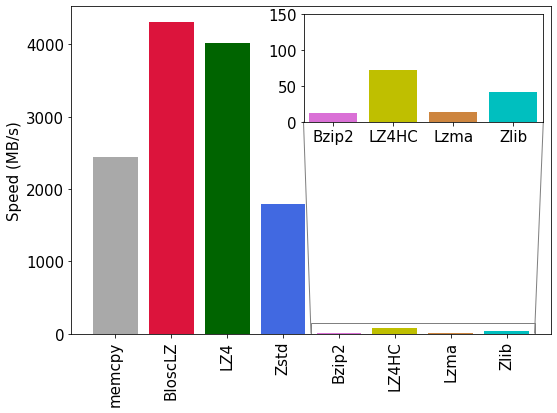

In [171]:
fig, ax = plt.subplots(figsize=(8, 6))
overview_data_x = ['memcpy', 'BloscLZ', 'LZ4', 'Zstd', 'Bzip2', 'LZ4HC', 'Lzma', 'Zlib']
overview_data_y = [raw_memcpy['Compression speed'], 
                   raw_blosc.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_lz4.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_zstd.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_bzip2.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_lz4hc.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_lzma.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_zlib.groupby(['Level'])['Compression speed'].mean().max()]

color = ['darkgrey', 'crimson', 'darkgreen', 'royalblue', 'orchid', 'y', 'peru', 'c']

ax.bar(overview_data_x, overview_data_y, color=color, align='center')
ax.set_ylabel('Speed (MB/s)')
ax.tick_params(axis='x', rotation=90)

axins = inset_axes(ax, width="50%", height=1.5, loc=1)
axins.bar(overview_data_x, overview_data_y, color=color, align='center')

x1, x2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1, y2 = 0, 150 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

fig.tight_layout()

fig.savefig('LzBench_Zoom-Raw-Compression.png', dpi=900, bbox_inches='tight')

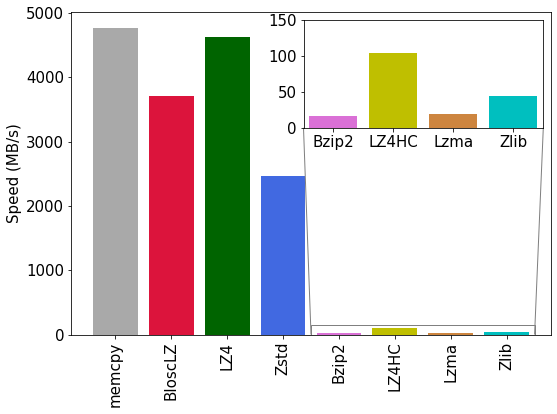

In [172]:
fig, ax = plt.subplots(figsize=(8, 6))
overview_data_x = ['memcpy', 'BloscLZ', 'LZ4', 'Zstd', 'Bzip2', 'LZ4HC', 'Lzma', 'Zlib']
overview_data_y = [proc_memcpy['Compression speed'], 
                   proc_blosc.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_lz4.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_zstd.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_bzip2.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_lz4hc.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_lzma.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_zlib.groupby(['Level'])['Compression speed'].mean().max()]

color = ['darkgrey', 'crimson', 'darkgreen', 'royalblue', 'orchid', 'y', 'peru', 'c']

ax.bar(overview_data_x, overview_data_y, color=color, align='center')
ax.set_ylabel('Speed (MB/s)')
ax.tick_params(axis='x', rotation=90)

axins = inset_axes(ax, width="50%", height=1.5, loc=1)
axins.bar(overview_data_x, overview_data_y, color=color, align='center')

x1, x2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1, y2 = 0, 150 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

fig.tight_layout()

fig.savefig('LzBench_Zoom-Proc-Compression.png', dpi=900, bbox_inches='tight')

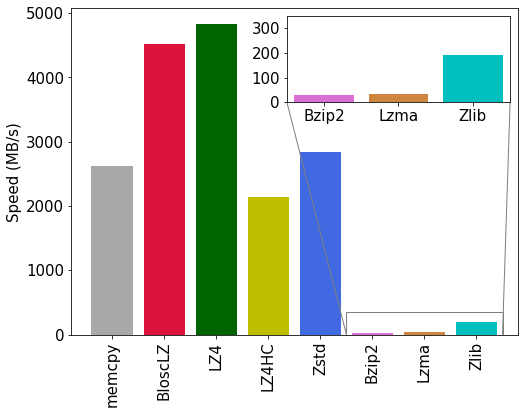

In [191]:
fig, ax = plt.subplots(figsize=(8, 6))

overview_data_x = ['memcpy', 'BloscLZ', 'LZ4', 'LZ4HC', 'Zstd', 'Bzip2', 'Lzma', 'Zlib']

overview_data_y = [raw_memcpy['Decompression speed'], 
                   raw_blosc.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_lz4.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_zstd.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_bzip2.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_lzma.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_zlib.groupby(['Level'])['Decompression speed'].mean().max()]

color = ['darkgrey', 'crimson', 'darkgreen', 'y', 'royalblue', 'orchid', 'peru', 'c']

#raw
ax.bar(overview_data_x, overview_data_y, color=color, align='center')
ax.set_ylabel('Speed (MB/s)')
ax.tick_params(axis='x', rotation=90)

axins = inset_axes(ax, width="50%", height=1.2, loc=1)
axins.bar(overview_data_x, overview_data_y, color=color, align='center')

x1, x2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1, y2 = 0, 350 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)
y_ticks = np.arange(0, 350, 100)
axins.set_yticks(y_ticks)

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

fig.savefig('LzBench_Zoom-Raw-Decompression.png', dpi=900, bbox_inches='tight')

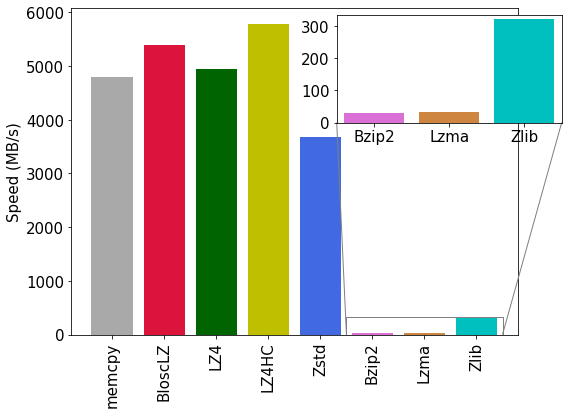

In [218]:
fig, ax2 = plt.subplots(figsize=(8, 6))

overview_data_x = ['memcpy', 'BloscLZ', 'LZ4', 'LZ4HC', 'Zstd', 'Bzip2', 'Lzma', 'Zlib']

overview_data_y_2 = [proc_memcpy['Decompression speed'], 
                   proc_blosc.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_lz4.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_zstd.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_bzip2.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_lzma.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_zlib.groupby(['Level'])['Decompression speed'].mean().max()]

#proc
ax2.bar(overview_data_x, overview_data_y_2, color=color, align='center')
ax2.set_ylabel('Speed (MB/s)')
ax2.tick_params(axis='x', rotation=90)
# tick = [0, 100, 200, 300]
# ax2.set_xticks(tick)

axins2 = inset_axes(ax2, width="50%", height=1.5, loc=1, bbox_to_anchor=(120, 380, 450, 1.5))
axins2.bar(overview_data_x, overview_data_y_2, color=color, align='center')

x1_2, x2_2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1_2, y2_2 = 0, 335 # specify the limits
axins2.set_xlim(x1_2, x2_2) # apply the x-limits
axins2.set_ylim(y1_2, y2_2)
y_ticks = np.arange(0, 350, 100)
axins2.set_yticks(y_ticks)

mark_inset(ax2, axins2, loc1=3, loc2=4, fc="none", ec="0.5")

fig.savefig('LzBench_Zoom-Proc-Decompression.png', bbox_inches='tight')

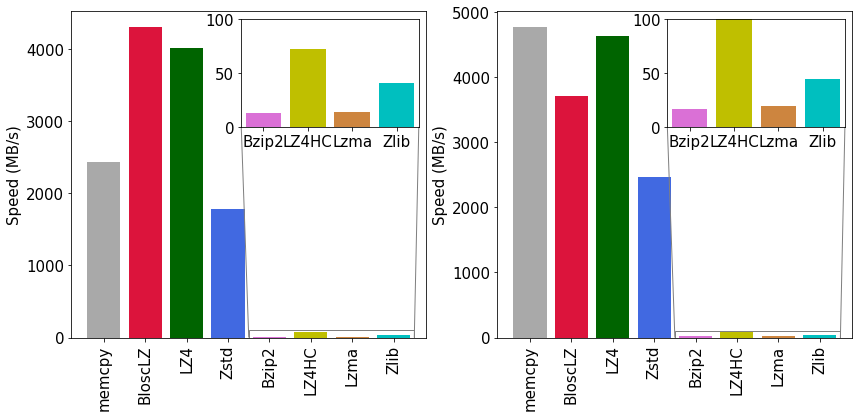

In [179]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(14, 6))

overview_data_x = ['memcpy', 'BloscLZ', 'LZ4', 'Zstd', 'Bzip2', 'LZ4HC', 'Lzma', 'Zlib']

overview_data_y = [raw_memcpy['Compression speed'], 
                   raw_blosc.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_lz4.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_zstd.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_bzip2.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_lz4hc.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_lzma.groupby(['Level'])['Compression speed'].mean().max(),
                   raw_zlib.groupby(['Level'])['Compression speed'].mean().max()]

overview_data_y_2 = [proc_memcpy['Compression speed'], 
                   proc_blosc.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_lz4.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_zstd.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_bzip2.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_lz4hc.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_lzma.groupby(['Level'])['Compression speed'].mean().max(),
                   proc_zlib.groupby(['Level'])['Compression speed'].mean().max()]

color = ['darkgrey', 'crimson', 'darkgreen', 'royalblue', 'orchid', 'y', 'peru', 'c']

#raw
ax.bar(overview_data_x, overview_data_y, color=color, align='center')
ax.set_ylabel('Speed (MB/s)')
ax.tick_params(axis='x', rotation=90)

axins = inset_axes(ax, width="50%", height=1.5, loc=1)
axins.bar(overview_data_x, overview_data_y, color=color, align='center')

x1, x2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1, y2 = 0, 100 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

#proc
ax2.bar(overview_data_x, overview_data_y_2, color=color, align='center')
ax2.set_ylabel('Speed (MB/s)')
ax2.tick_params(axis='x', rotation=90)

axins2 = inset_axes(ax2, width="50%", height=1.5, loc=1)
axins2.bar(overview_data_x, overview_data_y_2, color=color, align='center')

x1_2, x2_2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1_2, y2_2 = 0, 100 # specify the limits
axins2.set_xlim(x1_2, x2_2) # apply the x-limits
axins2.set_ylim(y1_2, y2_2)

mark_inset(ax2, axins2, loc1=3, loc2=4, fc="none", ec="0.5")

fig.savefig('LzBench_Zoom-Compression.png')

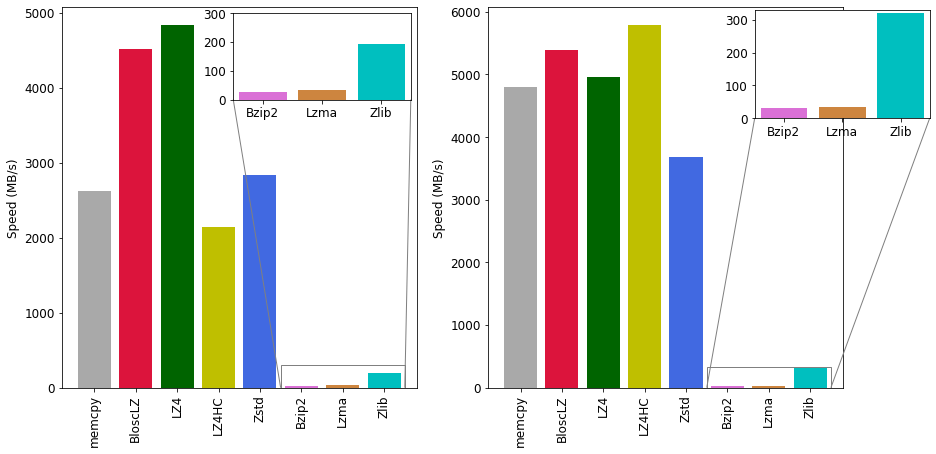

In [123]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(14, 7))

overview_data_x = ['memcpy', 'BloscLZ', 'LZ4', 'LZ4HC', 'Zstd', 'Bzip2', 'Lzma', 'Zlib']

overview_data_y = [raw_memcpy['Decompression speed'], 
                   raw_blosc.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_lz4.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_zstd.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_bzip2.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_lzma.groupby(['Level'])['Decompression speed'].mean().max(),
                   raw_zlib.groupby(['Level'])['Decompression speed'].mean().max()]

overview_data_y_2 = [proc_memcpy['Decompression speed'], 
                   proc_blosc.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_lz4.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_zstd.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_bzip2.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_lzma.groupby(['Level'])['Decompression speed'].mean().max(),
                   proc_zlib.groupby(['Level'])['Decompression speed'].mean().max()]

color = ['darkgrey', 'crimson', 'darkgreen', 'y', 'royalblue', 'orchid', 'peru', 'c']

#raw
ax.bar(overview_data_x, overview_data_y, color=color, align='center')
ax.set_ylabel('Speed (MB/s)')
ax.tick_params(axis='x', rotation=90)

axins = inset_axes(ax, width="50%", height=1.2, loc=1)
axins.bar(overview_data_x, overview_data_y, color=color, align='center')

x1, x2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1, y2 = 0, 300 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

#proc
ax2.bar(overview_data_x, overview_data_y_2, color=color, align='center')
ax2.set_ylabel('Speed (MB/s)')
ax2.tick_params(axis='x', rotation=90)

axins2 = inset_axes(ax2, width="50%", height=1.5, loc=1, bbox_to_anchor=(650, 445, 350, 1.5))
axins2.bar(overview_data_x, overview_data_y_2, color=color, align='center')

x1_2, x2_2 = overview_data_x.index('Bzip2')-0.5, overview_data_x.index('Zlib')+0.5
y1_2, y2_2 = 0, 330 # specify the limits
axins2.set_xlim(x1_2, x2_2) # apply the x-limits
axins2.set_ylim(y1_2, y2_2)

mark_inset(ax2, axins2, loc1=3, loc2=4, fc="none", ec="0.5")

fig.savefig('LzBench_Zoom-Decompression.png')